<a href="https://colab.research.google.com/github/DebjitHore/TensorflowDeveloperUdemy/blob/main/03_CNNTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to CNN.

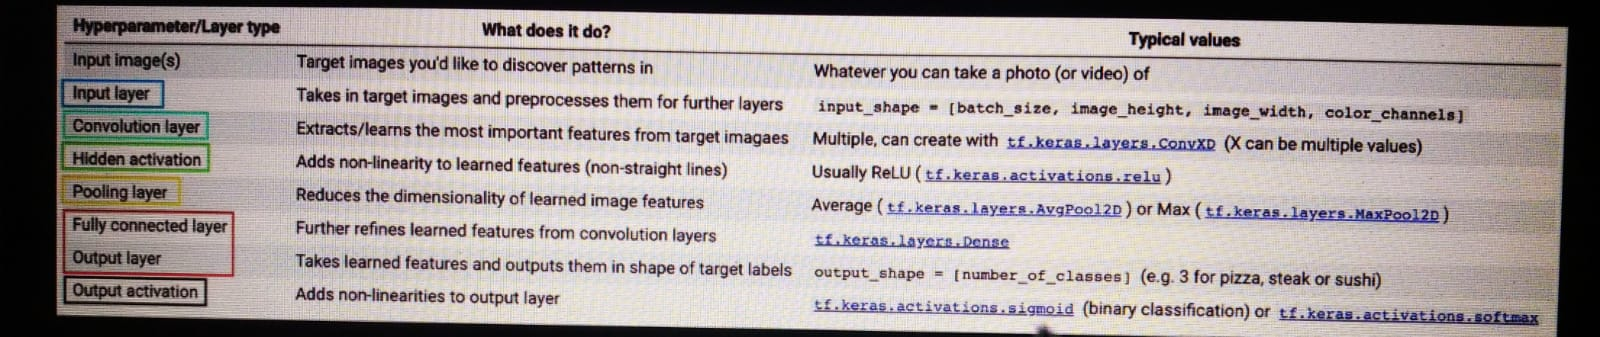

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import random
import matplotlib.image as mpimg

In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-12 04:39:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   199MB/s    in 0.5s    

2022-07-12 04:39:13 (199 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect and Visualise the Data

In [3]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [4]:
import os

#Walk through pizza steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [5]:
# Find images in file alternative

num_steak_images_train= len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [6]:
import pathlib
data_dir= pathlib.Path("pizza_steak/train")
class_names= np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [7]:
# Visualise images
def view_random_image(target_dir, target_class):
  target_folder= target_dir+target_class

  #random path
  random_image= random.sample(os.listdir(target_folder),1)

  #read images and plot it using matplotlib

  img= mpimg.imread(target_folder+"/"+random_image[0])

  plt.imshow(img)

  plt.title(target_class)

  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

Image shape: (288, 512, 3)


array([[[ 60,  51,  42],
        [ 65,  56,  47],
        [ 67,  58,  49],
        ...,
        [ 29,  30,  24],
        [ 27,  28,  22],
        [ 27,  28,  22]],

       [[ 61,  52,  43],
        [ 65,  56,  47],
        [ 66,  57,  48],
        ...,
        [ 31,  32,  26],
        [ 30,  31,  25],
        [ 29,  30,  24]],

       [[ 63,  54,  45],
        [ 66,  57,  48],
        [ 67,  58,  49],
        ...,
        [ 33,  34,  28],
        [ 32,  33,  27],
        [ 32,  33,  27]],

       ...,

       [[123, 126, 109],
        [123, 126, 109],
        [125, 128, 111],
        ...,
        [113, 131, 115],
        [121, 139, 123],
        [125, 143, 127]],

       [[122, 125, 108],
        [122, 125, 108],
        [123, 126, 109],
        ...,
        [103, 121, 105],
        [100, 118, 102],
        [101, 119, 103]],

       [[121, 124, 107],
        [122, 125, 108],
        [123, 126, 109],
        ...,
        [126, 144, 128],
        [106, 124, 108],
        [ 97, 115,  99]]

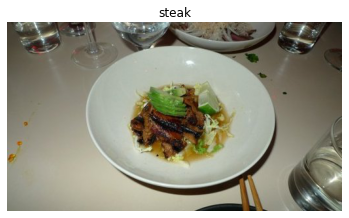

In [8]:
view_random_image(target_dir='pizza_steak/train/',
                  target_class='steak')

## Scaling the pixel values 
*Building an end-to-end example to 
  * Load our images
  * Preprocess 
  * Build CNN 
  * Compile our CNN
  * Fit CNN to our training data

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

#Preprocess Data (get all pixel values between 0 & 1)
train_datagen= ImageDataGenerator(rescale= 1./255)
valid_datagen= ImageDataGenerator(rescale= 1./255)

#setup paths to our data directories 

train_dir= "/content/pizza_steak/train"
test_dir= "/content/pizza_steak/test"

#import data from directories and turn it into batches
train_data= train_datagen.flow_from_directory(directory= train_dir, batch_size=32, target_size= (224,224),
                                              class_mode='binary', seed=42)

valid_data= valid_datagen.flow_from_directory(directory=test_dir,  batch_size=32, target_size= (224,224),
                                              class_mode='binary', seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Building the CNN 

In [10]:
model_1= tf.keras.Sequential([
                              tf.keras.layers.Conv2D(filters=10, 
                                                     kernel_size=3,
                                                     activation='relu',
                                                     input_shape= (224,224,3)),
                              tf.keras.layers.Conv2D(10,3,activation='relu'),
                              tf.keras.layers.MaxPool2D(pool_size= 2,
                                                        padding='valid'),
                              tf.keras.layers.Conv2D(10,3,activation='relu'),
                              tf.keras.layers.Conv2D(10,3,activation='relu'),
                              tf.keras.layers.MaxPool2D(pool_size= 2,
                                                        padding='valid'),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1, activation='sigmoid')
                              ])

model_1.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics= ['accuracy'])

In [11]:
history_1=model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 25s 210ms/step - loss: 0.5690 - accuracy: 0.7167 - val_loss: 0.3712 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4115 - accuracy: 0.8087 - val_loss: 0.3470 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3840 - accuracy: 0.8380 - val_loss: 0.3448 - val_accuracy: 0.8800
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3488 - accuracy: 0.8533 - val_loss: 0.3569 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3145 - accuracy: 0.8720 - val_loss: 0.2943 - val_accuracy: 0.8680


In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using NN_Classification models with pizza_steak dataset

In [13]:
tf.random.set_seed(42)

model_2= tf.keras.Sequential([
                            
                            tf.keras.layers.Flatten(input_shape=(224,224, 3)),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(1, activation='softmax'),
])

model_2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_2= model_2.fit(train_data, epochs=10, steps_per_epoch= len(train_data), validation_data= valid_data, validation_steps= len(valid_data))

Epoch 1/10
47/47 [==============================] - 9s 186ms/step - loss: nan - accuracy: 0.5080 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/10
47/47 [==============================] - 8s 179ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/10
47/47 [==============================] - 8s 179ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 4/10
47/47 [==============================] - 8s 178ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 5/10
47/47 [==============================] - 8s 176ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 6/10
47/47 [==============================] - 9s 193ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 7/10
47/47 [==============================] - 8s 178ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 8/10
47/47 [==============================

In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


*Even without almost 20x the number of parameters a ANN is simply guessing*

## Improving our ANN Model 

In [15]:
tf.random.set_seed(42)

model_3= tf.keras.Sequential([
                            
                            tf.keras.layers.Flatten(input_shape=(224,224, 3)),
                            tf.keras.layers.Dense(100, activation='relu'),
                            tf.keras.layers.Dense(100, activation='relu'),
                            tf.keras.layers.Dense(100, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_3= model_3.fit(train_data, epochs=10, steps_per_epoch= len(train_data), validation_data= valid_data, validation_steps= len(valid_data))

Epoch 1/10
47/47 [==============================] - 12s 256ms/step - loss: 3.2835 - accuracy: 0.6340 - val_loss: 0.9643 - val_accuracy: 0.6860
Epoch 2/10
47/47 [==============================] - 11s 245ms/step - loss: 0.8320 - accuracy: 0.7107 - val_loss: 0.6114 - val_accuracy: 0.7420
Epoch 3/10
47/47 [==============================] - 11s 237ms/step - loss: 0.7246 - accuracy: 0.7313 - val_loss: 0.4730 - val_accuracy: 0.7920
Epoch 4/10
47/47 [==============================] - 12s 253ms/step - loss: 0.4833 - accuracy: 0.7933 - val_loss: 0.4359 - val_accuracy: 0.7920
Epoch 5/10
47/47 [==============================] - 9s 195ms/step - loss: 0.5148 - accuracy: 0.7793 - val_loss: 0.4380 - val_accuracy: 0.7920
Epoch 6/10
47/47 [==============================] - 8s 176ms/step - loss: 0.5404 - accuracy: 0.7613 - val_loss: 0.5838 - val_accuracy: 0.7020
Epoch 7/10
47/47 [==============================] - 14s 301ms/step - loss: 0.3942 - accuracy: 0.8247 - val_loss: 0.5371 - val_accuracy: 0.7480
E

In [16]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


*Inspite of having 500 times the amount of parameters as the CNN, the ANN does not perform nearly as well as it expected to*

## Binary Classification : Breaking it down.
* Visualise data
* Preprocess 
* Create model
* Fit model
* Evaluate model
* Tune hyperparameters, improve model
* Repeat

### Visualise

Image shape: (512, 512, 3)
Image shape: (289, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 384, 3)
Image shape: (512, 512, 3)
Image shape: (288, 512, 3)
Image shape: (384, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


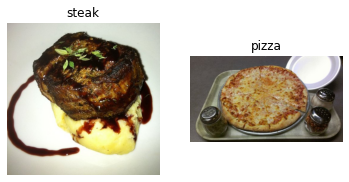

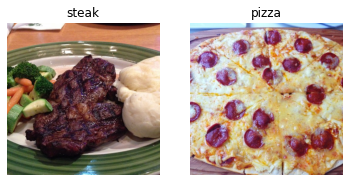

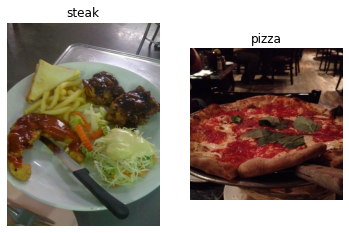

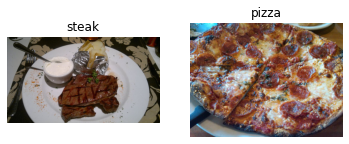

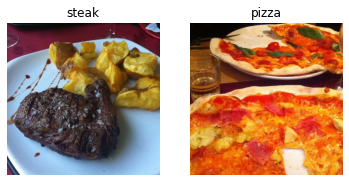

In [17]:
for i in range(0,5):
  plt.figure()
  plt.subplot(1,2,1)
  steak_image=  view_random_image("pizza_steak/train/",  'steak')
  plt.subplot(1,2,2)
  pizza_image=  view_random_image("pizza_steak/train/",  'pizza')

### Preprocess
* Turn data into numbers (tensors)
* Tensors should be of the same shape
* Scale features

In [18]:
# Define directory dataset paths
train_dir= "pizza_steak/train/"
test_dir= 'pizza_steak/test'

In [19]:
!nvidia-smi

Tue Jul 12 04:44:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    31W /  70W |   2328MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [20]:
# turning data into batches of 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen= ImageDataGenerator(rescale=1./255)

train_data= train_datagen.flow_from_directory(directory= train_dir, batch_size=32, target_size= (224,224),
                                              class_mode='binary', seed=42)
test_data= test_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224),
                                            seed=42, class_mode= 'binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Create a model

In [21]:
# make the creation of CNN model a little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [22]:
# Create model (baseline, a 3 layer CNN)
tf.random.set_seed(42)
model_4= Sequential([
                     Conv2D(filters=10, 
                            kernel_size=3,  #filter size
                            strides=1, 
                            padding='valid', #if 'same' input and output shapes are same, if 'valid' output is compressed
                            activation='relu',
                            input_shape=(224,224,3)), #input layer specify image shape
                     Conv2D(10,3, activation='relu'),
                     Conv2D(10,3, activation='relu'),
                     Flatten(),
                     Dense(1, activation='sigmoid')  #output layer for binary classification
])




In [23]:
model_4.compile( loss= tf.keras.losses.binary_crossentropy,
                optimizer= 'Adam',
                metrics=['accuracy'])


In [24]:
history_4=model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 208ms/step - loss: 1.1008 - accuracy: 0.5527 - val_loss: 0.5972 - val_accuracy: 0.6700
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.5192 - accuracy: 0.7520 - val_loss: 0.4522 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4294 - accuracy: 0.8240 - val_loss: 0.3914 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3612 - accuracy: 0.8473 - val_loss: 0.3587 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.2937 - accuracy: 0.8893 - val_loss: 0.3472 - val_accuracy: 0.8460


In [25]:
model_1.evaluate(test_data), model_4.evaluate(test_data)


16/16 [==============================] - 2s 134ms/step - loss: 0.3472 - accuracy: 0.8460


([0.2943376898765564, 0.8679999709129333],
 [0.34717491269111633, 0.8460000157356262])

* More the number of filters, higher will be the accuracy (analogous to increasing the numbers of neurons in an ANN)
* Kernel size is also filter size, which decides the number of tiles the filter covers (size of sliding window)
* Step size of sliding.
 

In [26]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


#### Evaluating our baseline model

Text(0.5, 1.0, 'Loss/Accuracy information')

<Figure size 864x648 with 0 Axes>

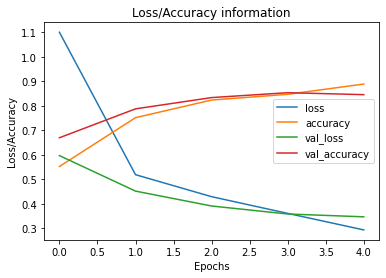

In [27]:
plt.figure(figsize=(12,9))
pd.DataFrame(history_4.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.title('Loss/Accuracy information')


**Most likely is overfitting, since validation loss is going up halfway through the epochs**

### Adjust/Tune the hyperparameters.

* Reduce overfitting by: 

  * Introduce Overfitting by: 
    * Increase convolutional layers
    * Increase the number of convolutional filters.
    * Add another dense layer to the output of our flattened layer
  * Reduce overfitting by:
    * Add data augmentation 
    * Add regularisation layers such as MaxPool2D
    * Add more data
    

In [38]:
model_5= Sequential([
                     Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation='relu'),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation='relu'),
                     MaxPool2D(pool_size=2),
                     Flatten(),
                     Dense(1, activation='sigmoid')

])

In [39]:
model_5.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer='Adam',
                metrics=['accuracy'])

In [40]:
history_5= model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 277ms/step - loss: 0.6361 - accuracy: 0.6367 - val_loss: 0.4896 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 13s 272ms/step - loss: 0.4826 - accuracy: 0.7807 - val_loss: 0.4406 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 13s 273ms/step - loss: 0.4230 - accuracy: 0.8160 - val_loss: 0.3955 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 14s 291ms/step - loss: 0.4276 - accuracy: 0.8147 - val_loss: 0.4191 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 13s 279ms/step - loss: 0.3823 - accuracy: 0.8360 - val_loss: 0.3702 - val_accuracy: 0.8400


In [41]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

#### Evaluating our improved model

Text(0.5, 1.0, 'Loss/Accuracy information')

<Figure size 864x648 with 0 Axes>

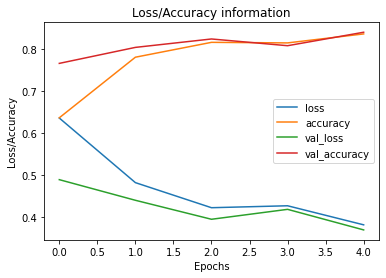

In [42]:
plt.figure(figsize=(12,9))
pd.DataFrame(history_5.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.title('Loss/Accuracy information')


### Finding Data Augmentation.
* Data augmentation is usually only performed on the training data, not on the test data.

In [43]:
#Create ImageDataGenerator training instance with data augmentation.

train_Datagen_Augmented= ImageDataGenerator(rescale=1./255,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)
# Create ImageDataGenerator without data augmentation

train_Datagen= ImageDataGenerator(rescale= 1./255)
test_Datagen= ImageDataGenerator(rescale= 1./255)

In [44]:

train_data= train_Datagen.flow_from_directory(directory=train_dir, target_size=(224,224),
                                              batch_size=32, class_mode='binary',
                                              shuffle= True)
train_dataAugmented = train_Datagen_Augmented.flow_from_directory(directory=train_dir, target_size=(224,224),
                                              batch_size=32, class_mode='binary',
                                              shuffle= True)
test_data= test_Datagen.flow_from_directory(directory=train_dir, target_size=(224,224),
                                              batch_size=32, class_mode='binary',
                                              shuffle= True)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [45]:
# Use augmented data to train using previous model
history_6= model_5.fit(train_dataAugmented, epochs=10, steps_per_epoch=len(train_dataAugmented),
                       validation_data= test_data, validation_steps= len(test_data))

Epoch 1/10
47/47 [==============================] - 26s 565ms/step - loss: 0.4927 - accuracy: 0.7773 - val_loss: 0.3568 - val_accuracy: 0.8620
Epoch 2/10
47/47 [==============================] - 27s 574ms/step - loss: 0.4643 - accuracy: 0.7893 - val_loss: 0.3851 - val_accuracy: 0.8300
Epoch 3/10
47/47 [==============================] - 26s 562ms/step - loss: 0.4605 - accuracy: 0.7820 - val_loss: 0.3355 - val_accuracy: 0.8607
Epoch 4/10
47/47 [==============================] - 26s 563ms/step - loss: 0.4499 - accuracy: 0.7887 - val_loss: 0.3612 - val_accuracy: 0.8493
Epoch 5/10
47/47 [==============================] - 26s 548ms/step - loss: 0.4343 - accuracy: 0.8053 - val_loss: 0.3149 - val_accuracy: 0.8667
Epoch 6/10
47/47 [==============================] - 26s 551ms/step - loss: 0.4572 - accuracy: 0.7987 - val_loss: 0.3340 - val_accuracy: 0.8653
Epoch 7/10
47/47 [==============================] - 26s 551ms/step - loss: 0.4384 - accuracy: 0.8087 - val_loss: 0.3516 - val_accuracy: 0.8567

Text(0.5, 1.0, 'Loss/Accuracy information')

<Figure size 864x648 with 0 Axes>

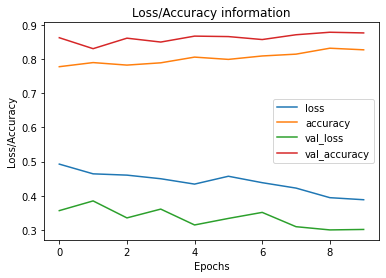

In [46]:
plt.figure(figsize=(12,9))
pd.DataFrame(history_6.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.title('Loss/Accuracy information')